# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [38]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 652


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    #city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | marcona
City not found. Skipping...
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | ca mau
Processing Record 5 of Set 1 | vazante
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | samusu
City not found. Skipping...
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | kegayli
City not found. Skipping...
Processing Record 11 of Set 1 | fallon
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | axim
Processing Record 14 of Set 1 | nancha
Processing Record 15 of Set 1 | portland
Processing Record 16 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 17 of Set 1 | beloha
Processing Record 18 of Set 1 | caravelas
Processing Record 19 of Set 1 | nome
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 |

Processing Record 37 of Set 4 | dukat
Processing Record 38 of Set 4 | touros
Processing Record 39 of Set 4 | likasi
Processing Record 40 of Set 4 | kjollefjord
Processing Record 41 of Set 4 | tahta
Processing Record 42 of Set 4 | viljoenskroon
Processing Record 43 of Set 4 | batagay-alyta
Processing Record 44 of Set 4 | byron bay
Processing Record 45 of Set 4 | oranjemund
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | cidreira
Processing Record 48 of Set 4 | nanortalik
Processing Record 49 of Set 4 | bardiyah
Processing Record 0 of Set 5 | iqaluit
Processing Record 1 of Set 5 | maitum
Processing Record 2 of Set 5 | zaragoza
Processing Record 3 of Set 5 | llata
Processing Record 4 of Set 5 | banmo
City not found. Skipping...
Processing Record 5 of Set 5 | constantine
Processing Record 6 of Set 5 | mujiayingzi
Processing Record 7 of Set 5 | abha
Processing Record 8 of Set 5 | mehamn
Processing Record 9 of Set 5 | tuktoyaktuk
Processing Record 10 of Set 5 | 

Processing Record 24 of Set 8 | bintulu
Processing Record 25 of Set 8 | lisburn
Processing Record 26 of Set 8 | hithadhoo
Processing Record 27 of Set 8 | bonavista
Processing Record 28 of Set 8 | marawi
Processing Record 29 of Set 8 | la huacana
Processing Record 30 of Set 8 | komsomolskiy
Processing Record 31 of Set 8 | mentok
City not found. Skipping...
Processing Record 32 of Set 8 | okato
Processing Record 33 of Set 8 | whitehorse
Processing Record 34 of Set 8 | progreso
Processing Record 35 of Set 8 | vestmanna
Processing Record 36 of Set 8 | kraskino
Processing Record 37 of Set 8 | kalamare
Processing Record 38 of Set 8 | krasnoyarsk-66
City not found. Skipping...
Processing Record 39 of Set 8 | andevoranto
City not found. Skipping...
Processing Record 40 of Set 8 | asfi
Processing Record 41 of Set 8 | bandar
Processing Record 42 of Set 8 | mont-dore
Processing Record 43 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 44 of Set 8 | nguiu
City not found. Skippin

Processing Record 15 of Set 12 | maltahohe
Processing Record 16 of Set 12 | togur
Processing Record 17 of Set 12 | aflu
City not found. Skipping...
Processing Record 18 of Set 12 | quatre cocos
Processing Record 19 of Set 12 | fatwa
Processing Record 20 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 21 of Set 12 | porto santo
Processing Record 22 of Set 12 | butiama
Processing Record 23 of Set 12 | lolua
City not found. Skipping...
Processing Record 24 of Set 12 | nilokheri
Processing Record 25 of Set 12 | ngaoundere
Processing Record 26 of Set 12 | bengkulu
Processing Record 27 of Set 12 | leshukonskoye
Processing Record 28 of Set 12 | vadodara
Processing Record 29 of Set 12 | killarney
Processing Record 30 of Set 12 | naftah
City not found. Skipping...
Processing Record 31 of Set 12 | la victoria
Processing Record 32 of Set 12 | kununurra
Processing Record 33 of Set 12 | verkhniy avzyan
Processing Record 34 of Set 12 | yarada
Processing Record 35 of Set 12 | lama

In [42]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [43]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,26.73,40,43,4.33,AU,1675043877
1,kodiak,57.7900,-152.4072,3.73,100,100,3.60,US,1675043878
2,ca mau,9.1769,105.1500,24.62,55,73,4.25,VN,1675043878
3,vazante,-17.9869,-46.9078,20.47,91,100,0.59,BR,1675043879
4,carnarvon,-24.8667,113.6333,25.40,70,0,4.65,AU,1675043879


In [44]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [45]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,26.73,40,43,4.33,AU,1675043877
1,kodiak,57.7900,-152.4072,3.73,100,100,3.60,US,1675043878
2,ca mau,9.1769,105.1500,24.62,55,73,4.25,VN,1675043878
3,vazante,-17.9869,-46.9078,20.47,91,100,0.59,BR,1675043879
4,carnarvon,-24.8667,113.6333,25.40,70,0,4.65,AU,1675043879


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

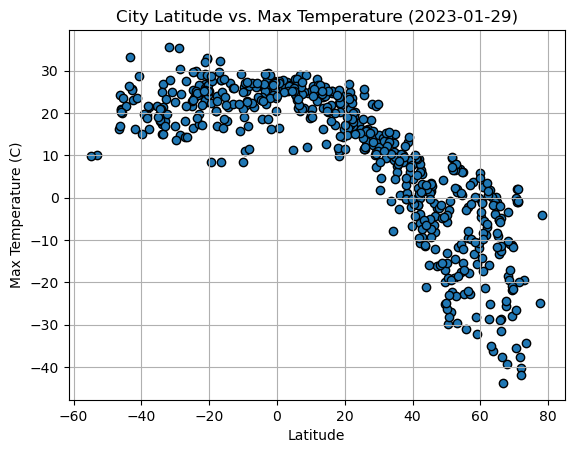

In [46]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,edgecolors="k")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Latitude vs. Max Temperature (2023-01-29)")
plt.grid(visible=None, which='major', axis='both')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

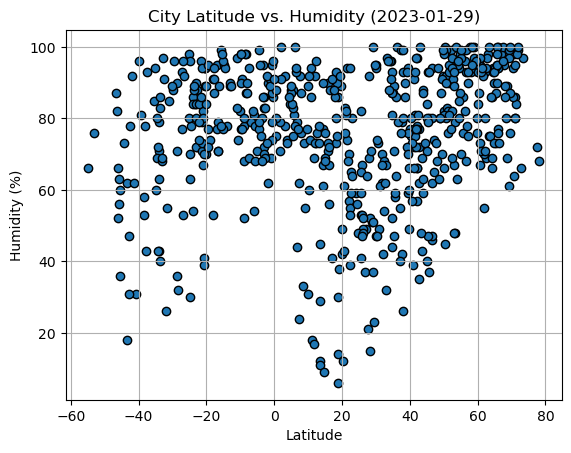

In [47]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,edgecolors="k")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (2023-01-29)")
plt.grid(visible=None, which='major', axis='both')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

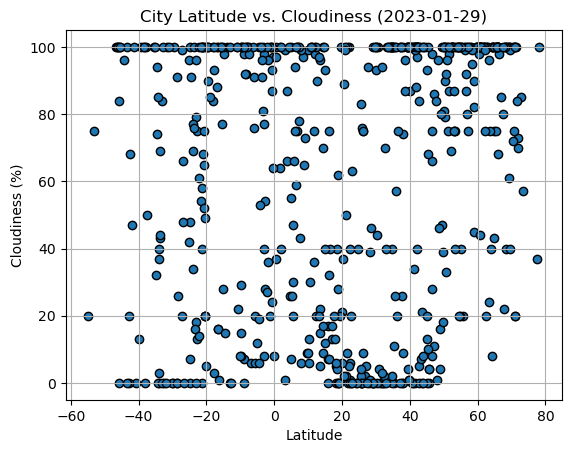

In [48]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolors="k")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (2023-01-29)")
plt.grid(visible=None, which='major', axis='both')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

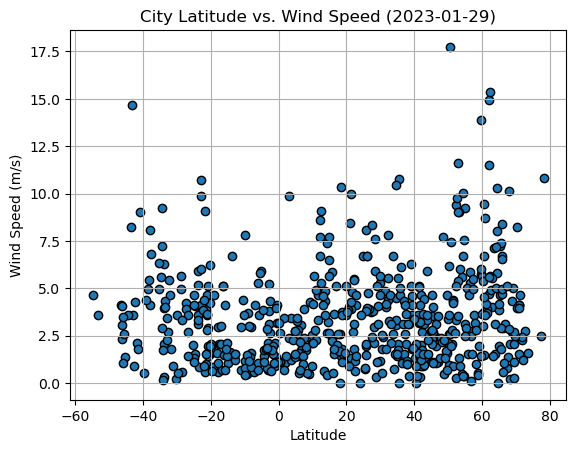

In [49]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,edgecolors="k")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed (2023-01-29)")
plt.grid(visible=None, which='major', axis='both')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [70]:
# Define a function to create Linear Regression plots
def linregressplot(hemi_df, xlabel = "Lat", ylabel = "Max Temp"):
    xvalues = hemi_df[xlabel]
    yvalues = hemi_df[ylabel]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.scatter(xvalues,yvalues)
    plt.plot(xvalues,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()


In [71]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kodiak,57.7900,-152.4072,3.73,100,100,3.60,US,1675043878
2,ca mau,9.1769,105.1500,24.62,55,73,4.25,VN,1675043878
7,fallon,39.4735,-118.7774,-2.16,59,100,1.79,US,1675043880
8,jamestown,42.0970,-79.2353,0.01,97,100,4.63,US,1675043880
9,axim,4.8699,-2.2405,25.93,88,7,2.74,GH,1675043881


In [72]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,26.73,40,43,4.33,AU,1675043877
3,vazante,-17.9869,-46.9078,20.47,91,100,0.59,BR,1675043879
4,carnarvon,-24.8667,113.6333,25.40,70,0,4.65,AU,1675043879
5,port elizabeth,-33.9180,25.5701,17.40,71,40,2.06,ZA,1675043879
6,bredasdorp,-34.5322,20.0403,18.02,69,94,7.22,ZA,1675043880


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7118136533446152


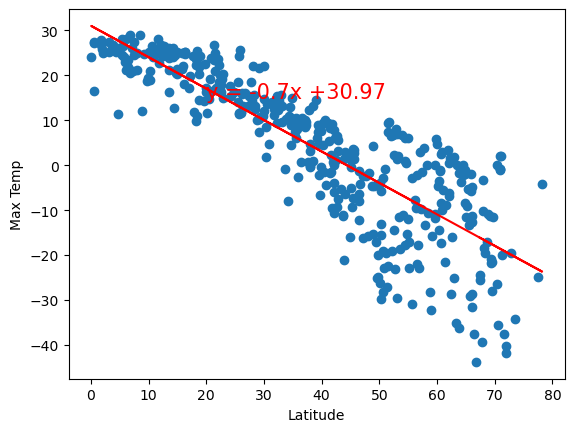

In [73]:
# Linear regression on Northern Hemisphere
linregressplot(northern_hemi_df)


The r-value is: 0.0590611994954822


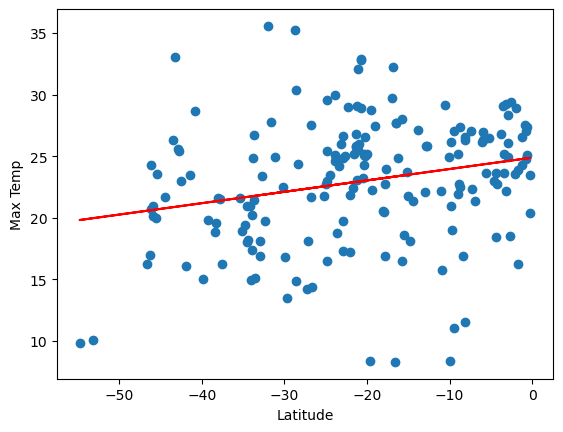

In [74]:
# Linear regression on Southern Hemisphere
linregressplot(southern_hemi_df)

**Discussion about the linear relationship:** The above linear regressions show that as you get further from the equater, temperatures decrease. This would make sense as the the equater gets the most sunlight yearly due to the pivot of the earths axis.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11056107294561056


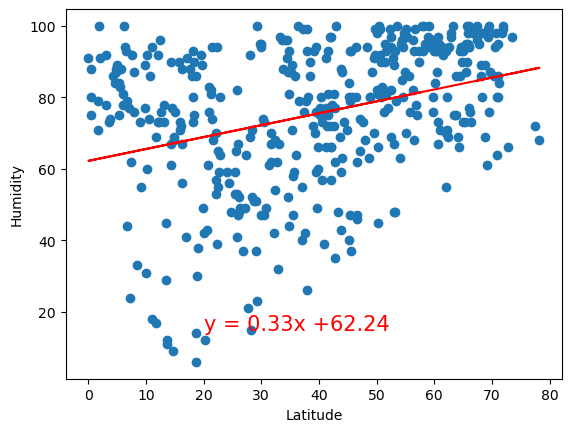

In [75]:
# Northern Hemisphere
linregressplot(northern_hemi_df, ylabel = 'Humidity')

The r-value is: 0.1348608807941541


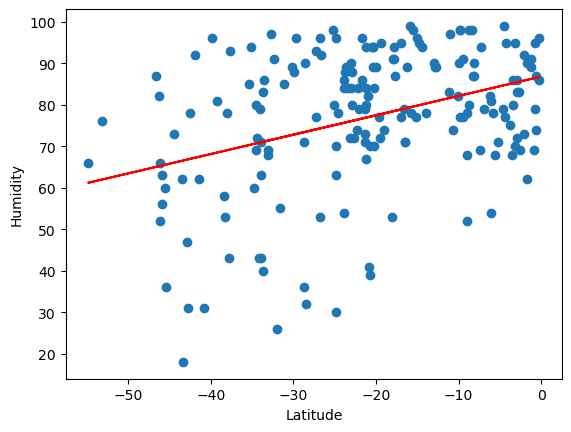

In [76]:
# Southern Hemisphere
linregressplot(southern_hemi_df, ylabel = 'Humidity')

**Discussion about the linear relationship:** The relationship between humidity and latitude is more interesting. Our data shows that the humidity is lowest in the southern hemisphere and the highest in the northern hemisphere although it is important to note that the time of the year could possibly affect this relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11789654525525257


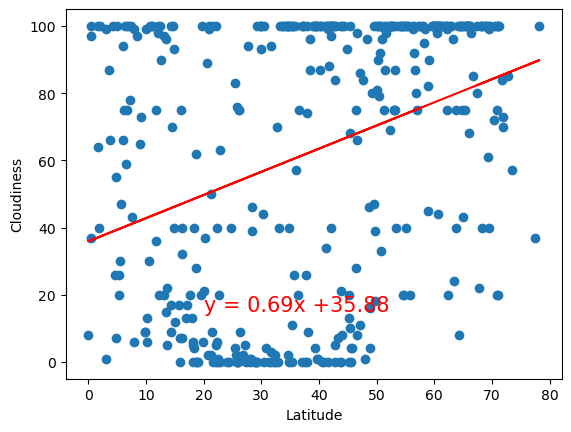

In [77]:
# Northern Hemisphere
linregressplot(northern_hemi_df, ylabel = 'Cloudiness')

The r-value is: 0.005433481464183717


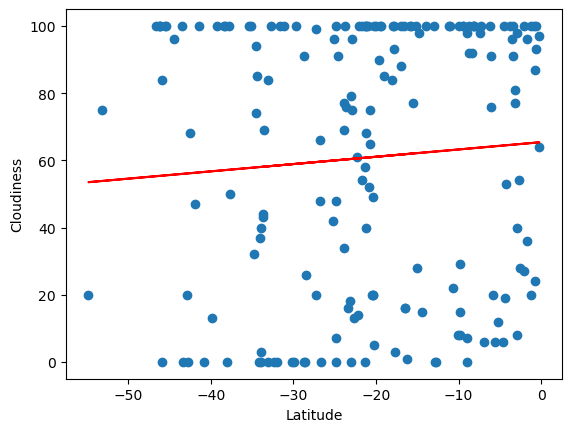

In [78]:
# Southern Hemisphere
linregressplot(southern_hemi_df, ylabel = 'Cloudiness')

**Discussion about the linear relationship:** The relationship with cloudiness is also the same as humidity. It is the least cloudy in the southern hemisphere(although there is very little difference with the equator) and the most cloudy in the northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.024469644185278572


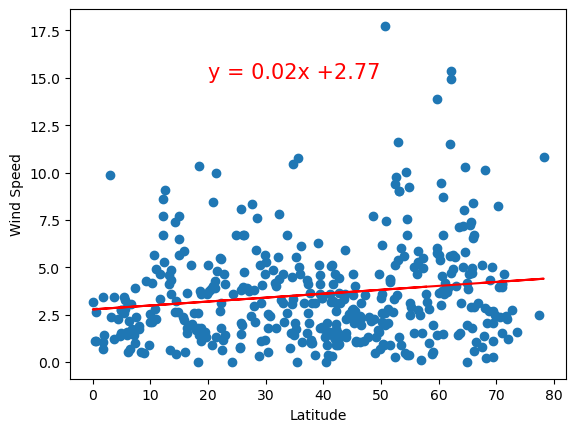

In [79]:
# Northern Hemisphere
linregressplot(northern_hemi_df, ylabel = 'Wind Speed')

The r-value is: 0.0898192998510122


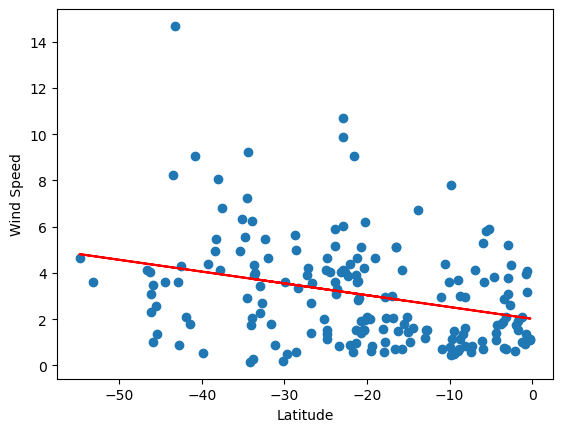

In [80]:
# Southern Hemisphere
linregressplot(southern_hemi_df, ylabel = 'Wind Speed')

**Discussion about the linear relationship:** The relationship with wind speed and latitude shows that it gets more windy as you go farther away from the equator. 